Выполните следующие шаги:

* Скачайте файл с предложениями (sentences.txt).
* Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
* Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

In [33]:
import re

data = open("data/sentences.txt", "r")
sentences = data.readlines()
data.close()
for i in xrange(len(sentences)):
    sentence = re.split("[^a-z]", sentences[i].lower())
    sentences[i] = filter(None, sentence)
    

* Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [46]:
word_dict = {}
counter = 0
for sentence in sentences:
    for word in sentence:
        if word not in word_dict:
            word_dict[word] = counter
            counter +=1
# word_dict

* Создайте матрицу размера nxd, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [78]:
import numpy as np

rows = len(sentences)
columns = len(word_dict)
matrix = np.zeros((rows, columns))
for i in range(0, rows):
    for word in sentences[i]:
        word_index = word_dict[word]
        matrix[i][word_index] += 1
# matrix

* Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.

In [97]:
from scipy.spatial.distance import cosine

target = matrix[0, :]
answers = []
for i in range(1, rows):
    sample  = matrix[i, :]
    answers.append((i, cosine(target, sample)))
answers

sorted_list = sorted(answers, key=lambda key: key[1])
print sorted_list[0:2]

[(6, 0.7327387580875756), (4, 0.77708871496985887)]


# Следующее задание: аппроксимация функции.

f(x) = sin(x / 5.0) * exp(x / 10.0) + 5.0 * exp(-x / 2.0)

* Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

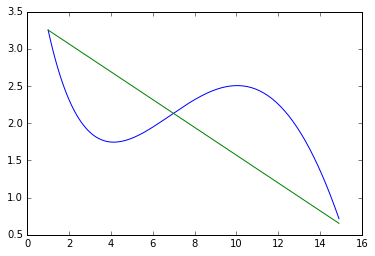

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from scipy.linalg import solve
from numpy import sin, exp

func = lambda x: sin(x / 5.0) * exp(x / 10.0) + 5.0 * exp(-x / 2.0)
x = [1, 15]
polinom_rank = 1
matrix_a = np.zeros((polinom_rank+1, polinom_rank+1), dtype=float)
matrix_b = np.zeros((polinom_rank+1, 1))

for i in range(len(x)):
    matrix_a[i] = [x[i]**n for n in range(0, polinom_rank+1)]
matrix_b = map(func, x)
answer = solve(matrix_a, matrix_b)

x_polin = np.arange(1, 15, 0.1)
y_polin = []
for i in range(len(x_polin)):
    y_polin.append(answer[0] * x_polin[i] ** 0 
                   + answer[1] * x_polin[i] ** 1)
x_ = np.arange(1, 15, 0.1)
plt.plot(x_, func(x_), x_polin, y_polin)
plt.show()


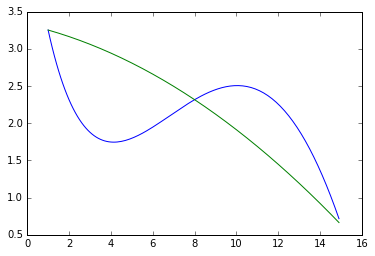

In [2]:
x = [1, 8, 15]
polinom_rank = 2
matrix_a = np.zeros((polinom_rank+1, polinom_rank+1), dtype=float)
matrix_b = np.zeros((polinom_rank+1, 1))

for i in range(len(x)):
    matrix_a[i] = [x[i]**n for n in range(0, polinom_rank+1)]
matrix_b = map(func, x)
answer = solve(matrix_a, matrix_b)

x_polin = np.arange(1, 15, 0.1)
y_polin = []
for i in range(len(x_polin)):
    y_polin.append(answer[0] * x_polin[i] ** 0 
                   + answer[1] * x_polin[i] ** 1 
                   + answer[2] * x_polin[i] ** 2)
x_ = np.arange(1, 15, 0.1)
plt.plot(x_, func(x_), x_polin, y_polin)
plt.show()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


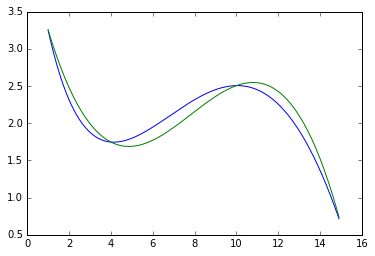

In [3]:
x = [1, 4, 10, 15]
polinom_rank = 3
matrix_a = np.zeros((polinom_rank+1, polinom_rank+1), dtype=float)
matrix_b = np.zeros((polinom_rank+1, 1))

for i in range(len(x)):
    matrix_a[i] = [x[i]**n for n in range(0, polinom_rank+1)]
matrix_b = map(func, x)
answer = solve(matrix_a, matrix_b)
print(answer)

x_polin = np.arange(1, 15, 0.1)
y_polin = []
for i in range(len(x_polin)):
    y_polin.append(answer[0] * x_polin[i] ** 0 
                   + answer[1] * x_polin[i] ** 1 
                   + answer[2] * x_polin[i] ** 2
                   + answer[3] * x_polin[i] ** 3)
x_ = np.arange(1, 15, 0.1)
plt.plot(x_, func(x_), x_polin, y_polin)
plt.show()